In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
    sys.path.append(module_path + "/src/simulations_v2/params/spring_2021_calibration/")
    sys.path.append(module_path + "/notebooks/pnas_paper_figs/")

from multiprocessing import Process


In [2]:
!pip install pyDOE

In [3]:
from uncertainty_analysis import calculate_pessimistic_scenario, \
            load_sim_output, residential_regression, virtual_vs_residential_regression,\
            UNCERTAINTY_PARAMS_LIST

from LHS_sim_code import *

### Processing Prior Sim

In [4]:
pd.set_option('display.max_columns', None)  

In [5]:
prior_output_sim_files = []
for i in range(1000):
    #fname = '/home/jmc678/covid_data/group-testing/notebooks/apr_29_scenarios/point_{}.dill'.format(i)
    if i != 524:
    
        #fname = '/Users/brianliu/GraduateSchool/Fall2021/MiscResearch/COVID/group-testing/notebooks/sept_29_prior_sims/point_{}.dill'.format(i)
        fname = '/home/yz685/group-testing/notebooks/sept_29_prior_sims/point_{}.dill'.format(i)

        prior_output_sim_files.append(fname)


scenario_data = load_sim_output(prior_output_sim_files)
#res_results = residential_regression(scenario_data)


In [6]:
prior_median_outcomes = np.array(scenario_data['res_cornell_inf_50'])

In [7]:
quantile_pess_sim_files = []

for i in range(5,96, 5):
    if i == 5:
        quantile_str = '05'
    else:
        quantile_str = str(i)
    fname = '/home/yz685/group-testing/notebooks/sept_30_linear_pess_sims/'+quantile_str+'_quantile.dill'
    quantile_pess_sim_files.append(fname)

quantile_pess_scenario_data = load_sim_output(quantile_pess_sim_files)

In [8]:
quantile_pess_median_outcomes = np.array(quantile_pess_scenario_data['res_cornell_inf_50'])

In [9]:
r = []

for i in range(19):
    r.append(sum(prior_median_outcomes < quantile_pess_median_outcomes[i]) / 999)

In [10]:
q_range = range(5, 96, 5)

Text(0, 0.5, 'Empirical quantile at linear pessimistic point')

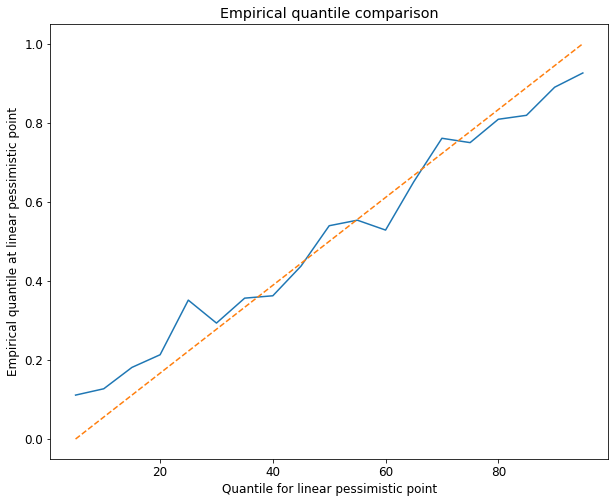

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(q_range, r)
plt.plot(q_range, np.linspace(0,1,19), '--')
plt.title('Empirical quantile comparison')
plt.xlabel('Quantile for linear pessimistic point')
plt.ylabel('Empirical quantile at linear pessimistic point')